In [2]:
from scipy.spatial import distance
from scipy.stats import zscore
import matplotlib.pyplot as plt
!pip install pandas
import numpy as np
import pandas as pd
import seaborn as sns
import skbio

/var/folders/jd/4qpzvg1152n2zyw7zvv8fk0c0000gn/T/ipykernel_68183/4269559921.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
taxo = pd.read_csv('~/Downloads/taxo.csv', index_col=0)
msp = pd.read_csv('~/Downloads/vect_atlas.csv', index_col=0)
msptaxo = msp.join(taxo['phylum']).groupby('phylum').sum().T
meta = pd.read_csv('~/Downloads/sampleID.csv', index_col=0)

In [4]:
meta2 = meta.loc[meta.type == 'Control']

In [5]:
meta1 = meta.loc[meta.Disease == 'T2D']
meta = pd.concat([meta1, meta2])

In [6]:
meta

,BioProject,type,Age,Gender,BMI,Geography,Sequencer,MgsRichness,GeneRichness,enteroType,Disease,IGC2mappedReadCount,IGC2mappedPercent
sample.ID,,,,,,,,,,,,,
SRS333664,PRJNA422434,Disease,37.0,Male,20.0,China,Illumina Genome Analyzer II,22,61548,ET-Bacteroides,T2D,31125344,83.5
SRS333665,PRJNA422434,Disease,78.0,Male,20.0,China,Illumina Genome Analyzer II,72,264694,ET-Bacteroides,T2D,47994254,85.0
SRS333666,PRJNA422434,Disease,65.0,Female,20.0,China,Illumina Genome Analyzer II,210,545864,ET-Bacteroides,T2D,50265602,80.1
SRS333667,PRJNA422434,Disease,65.0,Female,25.0,China,Illumina Genome Analyzer II,105,323553,ET-Bacteroides,T2D,46070008,85.6
SRS333668,PRJNA422434,Disease,63.0,Male,22.0,China,Illumina Genome Analyzer II,199,577881,ET-Firmicutes,T2D,65377321,83.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRS149244,PRJNA48479,Control,NaN,Male,NaN,USA,Illumina HiSeq 2000,91,276928,ET-Bacteroides,Healthy,56543397,86.3
SRS149325,PRJNA48479,Control,NaN,Female,NaN,USA,Illumina HiSeq 2000,201,543906,ET-Bacteroides,Healthy,32360942,81.4
SRS149784,PRJNA48479,Control,NaN,Female,NaN,USA,Illumina HiSeq 2000,283,671285,ET-Firmicutes,Healthy,39986434,81.4


In [7]:
msptaxo

phylum,Actinobacteria,Bacteroidetes,Candidatus Melainabacteria,Elusimicrobia,Euryarchaeota,Firmicutes,Fusobacteria,Proteobacteria,Spirochaetes,Synergistetes,Tenericutes,Verrucomicrobia,unclassified,unclassified Bacteria,unclassified Eukaryota
DRS087519,3.470200e-06,0.000110,0.000000e+00,0.000000e+00,5.050000e-08,0.000121,1.904000e-07,0.000019,0.000019,0.000000e+00,0.000000e+00,0.000000e+00,3.372050e-05,1.690000e-06,0.000000
DRS087520,2.268600e-06,0.000088,0.000000e+00,0.000000e+00,0.000000e+00,0.000158,3.300000e-06,0.000014,0.000000,7.890000e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
DRS087521,4.870700e-06,0.000121,0.000000e+00,0.000000e+00,0.000000e+00,0.000081,1.370000e-08,0.000005,0.000004,0.000000e+00,0.000000e+00,7.110000e-06,4.809800e-06,0.000000e+00,0.000000
DRS087522,4.070210e-06,0.000078,0.000000e+00,0.000000e+00,1.720000e-06,0.000196,0.000000e+00,0.000002,0.000000,8.940000e-08,0.000000e+00,0.000000e+00,8.115400e-06,0.000000e+00,0.000000
DRS087523,1.429200e-06,0.000176,0.000000e+00,0.000000e+00,0.000000e+00,0.000124,0.000000e+00,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.727000e-06,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRS4597848,1.548816e-05,0.000091,8.110000e-09,9.760000e-09,0.000000e+00,0.000065,0.000000e+00,0.000061,0.000000,1.670000e-08,1.333100e-07,4.630000e-08,1.157150e-06,0.000000e+00,0.000000
SRS4597847,8.024000e-06,0.000015,0.000000e+00,0.000000e+00,0.000000e+00,0.000096,0.000000e+00,0.000081,0.000000,0.000000e+00,0.000000e+00,1.620000e-07,2.163000e-07,0.000000e+00,0.000000
SRS4597846,2.590000e-07,0.000149,1.220000e-07,1.300000e-07,0.000000e+00,0.000107,0.000000e+00,0.000029,0.000000,0.000000e+00,2.062000e-06,2.380000e-07,1.306850e-05,7.340000e-08,0.000000
SRS4597845,4.085200e-06,0.000045,0.000000e+00,0.000000e+00,4.310000e-08,0.000096,0.000000e+00,0.000085,0.000000,0.000000e+00,0.000000e+00,1.940000e-07,2.577000e-07,3.090000e-08,0.000000


In [21]:
table = meta.join(msptaxo, on='sample.ID', how='left')
table1 = meta.join(msptaxo, on='sample.ID', how='left')

table['ActinobacteriaCounts'] = table['IGC2mappedReadCount'] * table['Actinobacteria']
table['BacteroidetesCounts'] = table['IGC2mappedReadCount'] * table['Bacteroidetes']
table['CandidatusMelainabacteriaCount'] = table['IGC2mappedReadCount'] * table['Candidatus Melainabacteria']
table['ElusimicrobiaCount'] = table['IGC2mappedReadCount'] * table['Elusimicrobia']
table['EuryarchaeotaCounts'] = table['IGC2mappedReadCount'] * table['Euryarchaeota']
table['FirmicutesCounts'] = table['IGC2mappedReadCount'] * table['Firmicutes']
table['FusobacteriaCounts'] = table['IGC2mappedReadCount'] * table['Fusobacteria']
table['ProteobacteriaCounts'] = table['IGC2mappedReadCount'] * table['Proteobacteria']
table['SpirochaetesCount'] = table['IGC2mappedReadCount'] * table['Spirochaetes']
table['SynergistetesCount'] = table['IGC2mappedReadCount'] * table['Synergistetes']
table['TenericutesCounts'] = table['IGC2mappedReadCount'] * table['Tenericutes']
table['VerrucomicrobiaCounts'] = table['IGC2mappedReadCount'] * table['Verrucomicrobia']
table['unclassifiedCount'] = table['IGC2mappedReadCount'] * table['unclassified']
table['unclassified BacteriaCount'] = table['IGC2mappedReadCount'] * table['unclassified Bacteria']
table['OtherCounts'] = table['CandidatusMelainabacteriaCount'] + table['ElusimicrobiaCount'] + table['SpirochaetesCount'] + table['SynergistetesCount'] + table['unclassified BacteriaCount'] + table['unclassifiedCount']
table['TotalReads'] = table['ActinobacteriaCounts'] + table['BacteroidetesCounts'] + table['CandidatusMelainabacteriaCount'] + table['ElusimicrobiaCount'] + table['EuryarchaeotaCounts'] + table['FirmicutesCounts'] + table['FusobacteriaCounts'] + table['ProteobacteriaCounts'] + table['SpirochaetesCount'] + table['SynergistetesCount'] + table['TenericutesCounts'] + table['VerrucomicrobiaCounts'] + table['unclassifiedCount'] + table['unclassified BacteriaCount']
table = table.drop('unclassified Eukaryota', axis = 1)
table

,BioProject,type,Age,Gender,BMI,Geography,Sequencer,MgsRichness,GeneRichness,enteroType,...,FusobacteriaCounts,ProteobacteriaCounts,SpirochaetesCount,SynergistetesCount,TenericutesCounts,VerrucomicrobiaCounts,unclassifiedCount,unclassified BacteriaCount,OtherCounts,TotalReads
sample.ID,,,,,,,,,,,,,,,,,,,,,
SRS333664,PRJNA422434,Disease,37.0,Male,20.0,China,Illumina Genome Analyzer II,22,61548,ET-Bacteroides,...,0.000000,4977.711302,0.0,0.000000,0.0,0.000000,14.193157,0.000000,14.193157,5158.041585
SRS333665,PRJNA422434,Disease,78.0,Male,20.0,China,Illumina Genome Analyzer II,72,264694,ET-Bacteroides,...,0.000000,350.593226,0.0,0.000000,0.0,0.000000,66.999979,0.000000,66.999979,11277.293372
SRS333666,PRJNA422434,Disease,65.0,Female,20.0,China,Illumina Genome Analyzer II,210,545864,ET-Bacteroides,...,0.000000,1221.170631,0.0,55.191631,0.0,0.000000,12.827782,2.287085,70.306498,13499.138561
SRS333667,PRJNA422434,Disease,65.0,Female,25.0,China,Illumina Genome Analyzer II,105,323553,ET-Bacteroides,...,6.763077,258.613990,0.0,0.000000,0.0,140.513524,0.000000,0.000000,0.000000,14770.467027
SRS333668,PRJNA422434,Disease,63.0,Male,22.0,China,Illumina Genome Analyzer II,199,577881,ET-Firmicutes,...,177.826313,134.539989,0.0,0.000000,0.0,0.371997,530.393130,0.000000,530.393130,13646.074843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRS149244,PRJNA48479,Control,NaN,Male,NaN,USA,Illumina HiSeq 2000,91,276928,ET-Bacteroides,...,0.000000,124.107102,0.0,0.000000,0.0,0.000000,1.040399,0.000000,1.040399,6703.064220
SRS149325,PRJNA48479,Control,NaN,Female,NaN,USA,Illumina HiSeq 2000,201,543906,ET-Bacteroides,...,3.226386,83.297065,0.0,0.543664,0.0,0.000000,93.361318,0.000000,93.904981,7148.245693
SRS149784,PRJNA48479,Control,NaN,Female,NaN,USA,Illumina HiSeq 2000,283,671285,ET-Firmicutes,...,0.000000,21.936558,0.0,0.000000,0.0,0.907692,415.820127,0.000000,415.820127,10423.293741


In [19]:
table['ActinobacteriaRel'] = table['ActinobacteriaCounts'] / table['TotalReads']
table['BacteroidetesRel'] = table['BacteroidetesCounts'] / table['TotalReads']
table['CandidatusMelainabacteriaRels'] = table['CandidatusMelainabacteriaCount'] / table['TotalReads']
table['ElusimicrobiaRels'] = table['ElusimicrobiaCount'] / table['TotalReads']
table['EuryarchaeotaRel'] = table['EuryarchaeotaCounts'] / table['TotalReads']
table['FirmicutesRel'] = table['FirmicutesCounts'] / table['TotalReads']
table['FusobacteriaRel'] = table['FusobacteriaCounts'] / table['TotalReads']
table['ProteobacteriaRel'] = table['ProteobacteriaCounts'] / table['TotalReads']
table['SpirochaetesRels'] = table['SpirochaetesCount'] / table['TotalReads']
table['SynergistetesRels'] = table['SynergistetesCount'] / table['TotalReads']
table['TenericutesRel'] = table['TenericutesCounts'] / table['TotalReads']
table['VerrucomicrobiaRel'] = table['VerrucomicrobiaCounts'] / table['TotalReads']
table['unclassifiedRels'] = table['unclassifiedCount'] / table['TotalReads']
table['unclassified BacteriaRels'] = table['unclassified BacteriaCount'] / table['TotalReads']
table['OtherCountsRel'] = table['OtherCounts'] / table['TotalReads']
table['RelSum'] = table['ActinobacteriaRel'] + table['BacteroidetesRel'] + table['EuryarchaeotaRel'] + table['FirmicutesRel'] + table['FusobacteriaRel'] + table['ProteobacteriaRel'] + table['TenericutesRel'] + table['VerrucomicrobiaRel'] + table['OtherCountsRel']
table

,BioProject,type,Age,Gender,BMI,Geography,Sequencer,MgsRichness,GeneRichness,enteroType,...,unclassifiedRel,unclassified BacteriaRel,OtherCountsRel,RelSum,CandidatusMelainabacteriaRels,ElusimicrobiaRels,SpirochaetesRels,SynergistetesRels,unclassifiedRels,unclassified BacteriaRels
sample.ID,,,,,,,,,,,,,,,,,,,,,
SRS333664,PRJNA422434,Disease,37.0,Male,20.0,China,Illumina Genome Analyzer II,22,61548,ET-Bacteroides,...,0.002752,0.000000,0.002752,1.000008,0.0,0.0,0.0,0.000000,0.002752,0.000000
SRS333665,PRJNA422434,Disease,78.0,Male,20.0,China,Illumina Genome Analyzer II,72,264694,ET-Bacteroides,...,0.005941,0.000000,0.005941,1.000026,0.0,0.0,0.0,0.000000,0.005941,0.000000
SRS333666,PRJNA422434,Disease,65.0,Female,20.0,China,Illumina Genome Analyzer II,210,545864,ET-Bacteroides,...,0.000950,0.000169,0.005208,1.000010,0.0,0.0,0.0,0.004089,0.000950,0.000169
SRS333667,PRJNA422434,Disease,65.0,Female,25.0,China,Illumina Genome Analyzer II,105,323553,ET-Bacteroides,...,0.000000,0.000000,0.000000,1.000032,0.0,0.0,0.0,0.000000,0.000000,0.000000
SRS333668,PRJNA422434,Disease,63.0,Male,22.0,China,Illumina Genome Analyzer II,199,577881,ET-Firmicutes,...,0.038868,0.000000,0.038868,1.000005,0.0,0.0,0.0,0.000000,0.038868,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRS149244,PRJNA48479,Control,NaN,Male,NaN,USA,Illumina HiSeq 2000,91,276928,ET-Bacteroides,...,0.000155,0.000000,0.000155,1.000010,0.0,0.0,0.0,0.000000,0.000155,0.000000
SRS149325,PRJNA48479,Control,NaN,Female,NaN,USA,Illumina HiSeq 2000,201,543906,ET-Bacteroides,...,0.013061,0.000000,0.013137,1.000034,0.0,0.0,0.0,0.000076,0.013061,0.000000
SRS149784,PRJNA48479,Control,NaN,Female,NaN,USA,Illumina HiSeq 2000,283,671285,ET-Firmicutes,...,0.039894,0.000000,0.039894,1.000028,0.0,0.0,0.0,0.000000,0.039894,0.000000


In [20]:
table.to_csv('sample.csv')

,Actinobacteria,Bacteroidetes,Candidatus Melainabacteria,Elusimicrobia,Euryarchaeota,Firmicutes,Fusobacteria,Proteobacteria,Spirochaetes,Synergistetes,Tenericutes,Verrucomicrobia
Disease,,,,,,,,,,,,
Healthy,0.000007,0.000103,6.123026e-07,2.561782e-07,7.063125e-07,0.000130,5.397800e-07,0.000013,4.398499e-07,2.636297e-08,4.287236e-07,0.000002
T2D,0.000009,0.000094,2.753053e-07,1.852151e-08,5.713369e-07,0.000137,6.742284e-07,0.000009,1.997347e-08,8.060863e-08,2.654524e-07,0.000002


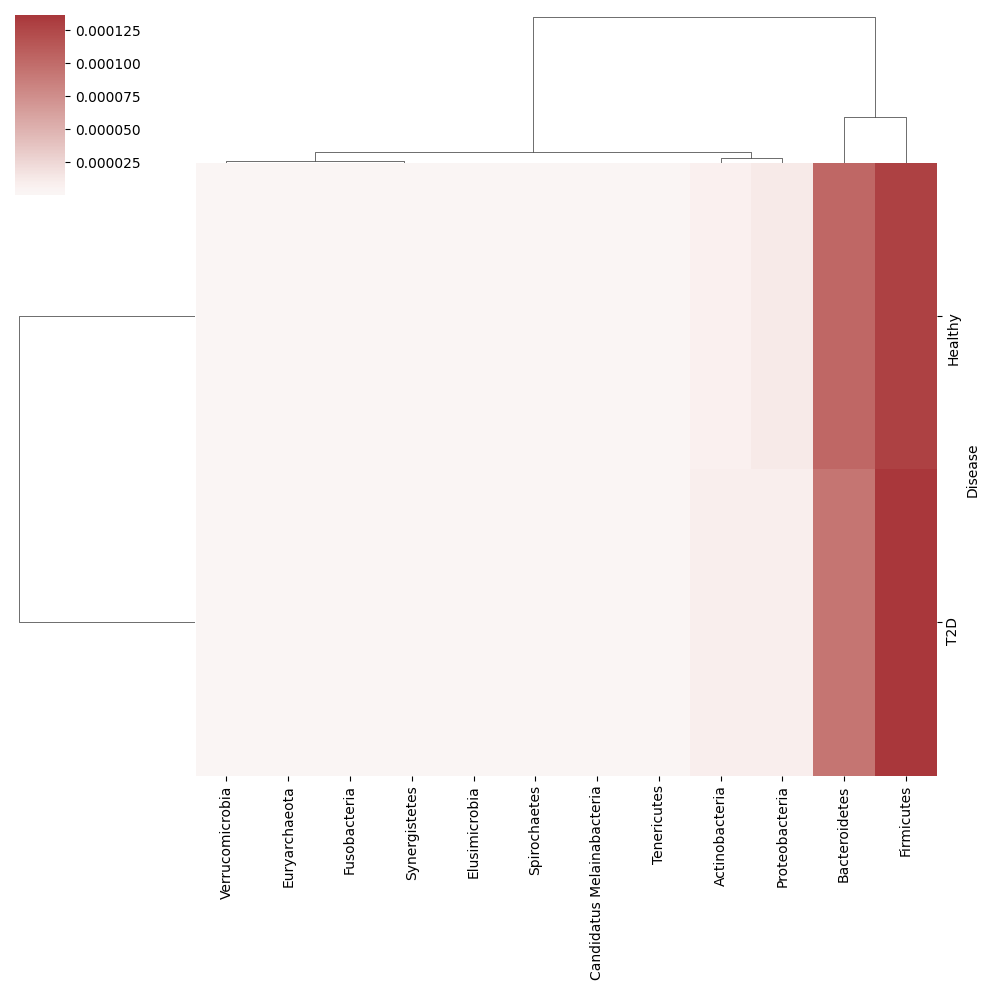

In [81]:
meta_reset = meta.reset_index()
nmsptaxo = msptaxo.T.loc[~msptaxo.columns.str.contains('unclassified')]
table1 = nmsptaxo.T.join(meta_reset.set_index('sample.ID'), how='inner')
table1 = table1.set_index('Disease')
table1 = table1.drop('BioProject', axis = 1)
table1 = table1.drop('type', axis = 1)
table1 = table1.drop('Age', axis = 1)
table1 = table1.drop('Gender', axis = 1)
table1 = table1.drop('BMI', axis = 1)
table1 = table1.drop('Geography', axis = 1)
table1 = table1.drop('Sequencer', axis = 1)
table1 = table1.drop('MgsRichness', axis = 1)
table1 = table1.drop('GeneRichness', axis = 1)
table1 = table1.drop('enteroType', axis = 1)
table1 = table1.drop('IGC2mappedReadCount', axis = 1)
table1 = table1.drop('IGC2mappedPercent', axis = 1)
table1 = table1.groupby(level='Disease').mean()
zscores = table1.apply(zscore)
zscores.replace([np.inf, -np.inf], np.nan, inplace=True)
zscores.dropna(axis=1, inplace=True)
table1T = table1.T
table1T = table1T.drop('NGT', axis = 1)
plotdf = table1T.T.astype('float').infer_objects()
sns.clustermap(data=plotdf, cmap='vlag', center=0, yticklabels=True)
plotdf